# Music Recommendation System

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [3]:
members_data = pd.read_csv("members.csv")
sample_submission_data = pd.read_csv("sample_submission.csv")
songs_extra_info = pd.read_csv("song_extra_info.csv", encoding="ISO-8859-1")
songs_data = pd.read_csv("songs.csv",encoding="ISO-8859-1")
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")


In [4]:
members_data

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613
...,...,...,...,...,...,...,...
34398,Wwd/cudKVuLJ3txRVxlg2Zaeliu+LRUfiBmfrnxhRCY=,1,0,NaN,7,20131111,20170910
34399,g3JGnJX6Hg50lFbrNWfsHwCUmApIkiv2M8sXOaeXoIQ=,4,18,male,3,20141024,20170518
34400,IMaPMJuyN+ip9Vqi+z2XuXbFAP2kbHr+EvvCNkFfj+o=,1,0,NaN,7,20130802,20170908
34401,WAnCAJjUty9Stv8yKtV7ZC7PN+ilOy5FX3aIJgGPANM=,1,0,NaN,7,20151020,20170920


In [5]:
sample_submission_data

,id,target
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5
...,...,...
1048570,1048570,0.5
1048571,1048571,0.5
1048572,1048572,0.5
1048573,1048573,0.5


In [6]:
songs_extra_info

,song_id,name,isrc
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,????,TWUM71200043
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,??®???,TWA530887303
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,???????ý,TWA471306001
...,...,...,...
1048570,9IWSYOb4iwt4HQwiYZHogHJ8x/D+WfzJ+TqDm6furwc=,Fanfare Royale,GBCRL1100130
1048571,t1vq3y9JHURWs51aK5iT+PiwS4mERjxj2fQW16/xliY=,Sunset,PLL431688926
1048572,2MpU7KNxhakVbZ6RgrTdq6Tr3hEtCCskH1dBUMwfRgA=,Super Mario Kart - Ghost Valley,AUXN21415808
1048573,O/E6/qwfVrHxKDQbQa2q2KphIsPZ3iVX/0UgYxTCrok=,Let It Be,USA371357737


In [7]:
songs_data

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,¬æ¨­?ý (Jeff Chang),?ý?,«???¬?,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,??ø§ú,???,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,ý??ý??,Traditional,Traditional,52.0
...,...,...,...,...,...,...,...
1048570,2ZRF6vTIjeJOFG0QOvQE+9L2Uhzo7prCVNIa0sBqIbA=,182044,NaN,Dragonbay,NaN,NaN,52.0
1048571,k0TIUBzWIi7l7XYyj3YRSvLVuLJ1y1z/v/LYRKpYvVg=,470158,1152|947,Massage Tribe,NaN,NaN,-1.0
1048572,+FyGIHSC23kAAF4UeTku3oquYaFYH21OWHy+eNKpNoQ=,360559,958,Antonio Vivaldi| Wolfgang Amadeus Mozart| Ludw...,Antonio Vivaldi,NaN,-1.0
1048573,LW/HYg6lUeKFxJh/0DwaivmohvW7Mwh14sWQ4dA1riU=,767652,958,Sviatoslav Richter,NaN,NaN,-1.0


In [8]:
train_data

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1
...,...,...,...,...,...,...
1048570,xF+utWsPHfbvt60HOgU/ZYQ0HnboeyRf0UXo5pPyP0Q=,gLwsZgboyA4rhNmspKQpnvdsLFdv4fzQMBkcdvnCfk8=,my library,Local playlist more,local-library,0
1048571,P3obZgg2TmWGlUbGb7rz/G2CCX7cpYJ691Iyvfv2j4g=,iUYmqmX3CXBXzFIn2RiJLMLnwZ3/TSYhf9NDuZGqCBg=,discover,Discover Chart,online-playlist,1
1048572,P3obZgg2TmWGlUbGb7rz/G2CCX7cpYJ691Iyvfv2j4g=,IKoZne4v1VzCh7r0lVmOn1hOUdTMkAiniHnKELDq8es=,discover,Discover Chart,online-playlist,1
1048573,FBn5lX1m8BNAFevy7oiAe8JBxi20akyXBW7zG0MBVbQ=,T86YHdD4C9JSc274b1IlMkLuNdz4BQRB50fWWE7hx9g=,discover,Online playlist more,online-playlist,1


In [9]:
test_data

,id,msno,song_id,source_system_tab,source_screen_name,source_type
0,0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-library
1,1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,my library,Local playlist more,local-library
2,2,/uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=,8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=,discover,NaN,song-based-playlist
3,3,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=,radio,Radio,radio
4,4,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=,radio,Radio,radio
...,...,...,...,...,...,...
1048570,1048570,J2a1D0MldMzdUZh99b2V5HQCtAl0bWnWSp45HSU/YH0=,WGGGNQ/g+Z+3CvYBSiL5PAXI8MqNApAT+skNJiHm1mE=,discover,Album more,album
1048571,1048571,J2a1D0MldMzdUZh99b2V5HQCtAl0bWnWSp45HSU/YH0=,Ka7MiMDNrrXKDOF468tyHz2c6aruoe4K4YH9O21kIrM=,discover,Album more,album
1048572,1048572,J2a1D0MldMzdUZh99b2V5HQCtAl0bWnWSp45HSU/YH0=,WnX1xlQ8vaDlSal2wzPiJYfaJZex76ya7wvlphajEOU=,discover,Album more,album
1048573,1048573,J2a1D0MldMzdUZh99b2V5HQCtAl0bWnWSp45HSU/YH0=,CSpYNBusxUao3QvX8hb7kse7X9o7d/QDE3NPlydjLqI=,discover,Album more,album


In [10]:
songs_data.isnull().sum()
members_data.isnull().sum()
train_data.isnull().sum()
test_data.isnull().sum()
sample_submission_data.isnull().sum()
songs_extra_info.isnull().sum()

song_id        0
name           2
isrc       81323
dtype: int64

In [11]:
members_data.isnull().sum()

msno                          0
city                          0
bd                            0
gender                    19902
registered_via                0
registration_init_time        0
expiration_date               0
dtype: int64

In [12]:
songs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 7 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   song_id      1048575 non-null  object 
 1   song_length  1048575 non-null  int64  
 2   genre_ids    1011299 non-null  object 
 3   artist_name  1048575 non-null  object 
 4   composer     570554 non-null   object 
 5   lyricist     188366 non-null   object 
 6   language     1048574 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 56.0+ MB


In [13]:
songs_data.columns

Index(['song_id', 'song_length', 'genre_ids', 'artist_name', 'composer',
       'lyricist', 'language'],
      dtype='object')

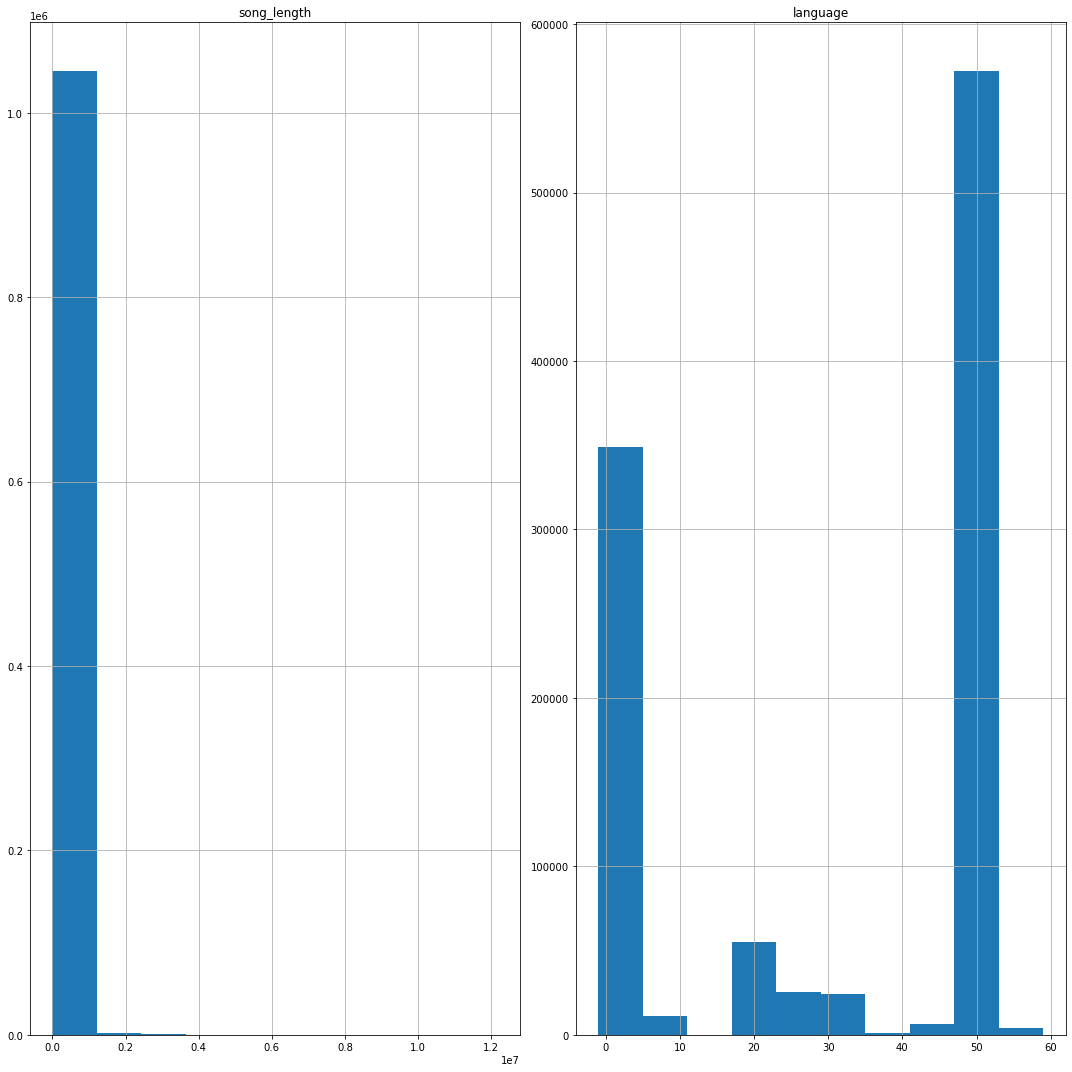

In [14]:
import matplotlib.pyplot as plt
songs_data.hist(figsize=(15,15))
plt.tight_layout()
plt.show()

In [15]:
members_data.columns


Index(['msno', 'city', 'bd', 'gender', 'registered_via',
       'registration_init_time', 'expiration_date'],
      dtype='object')

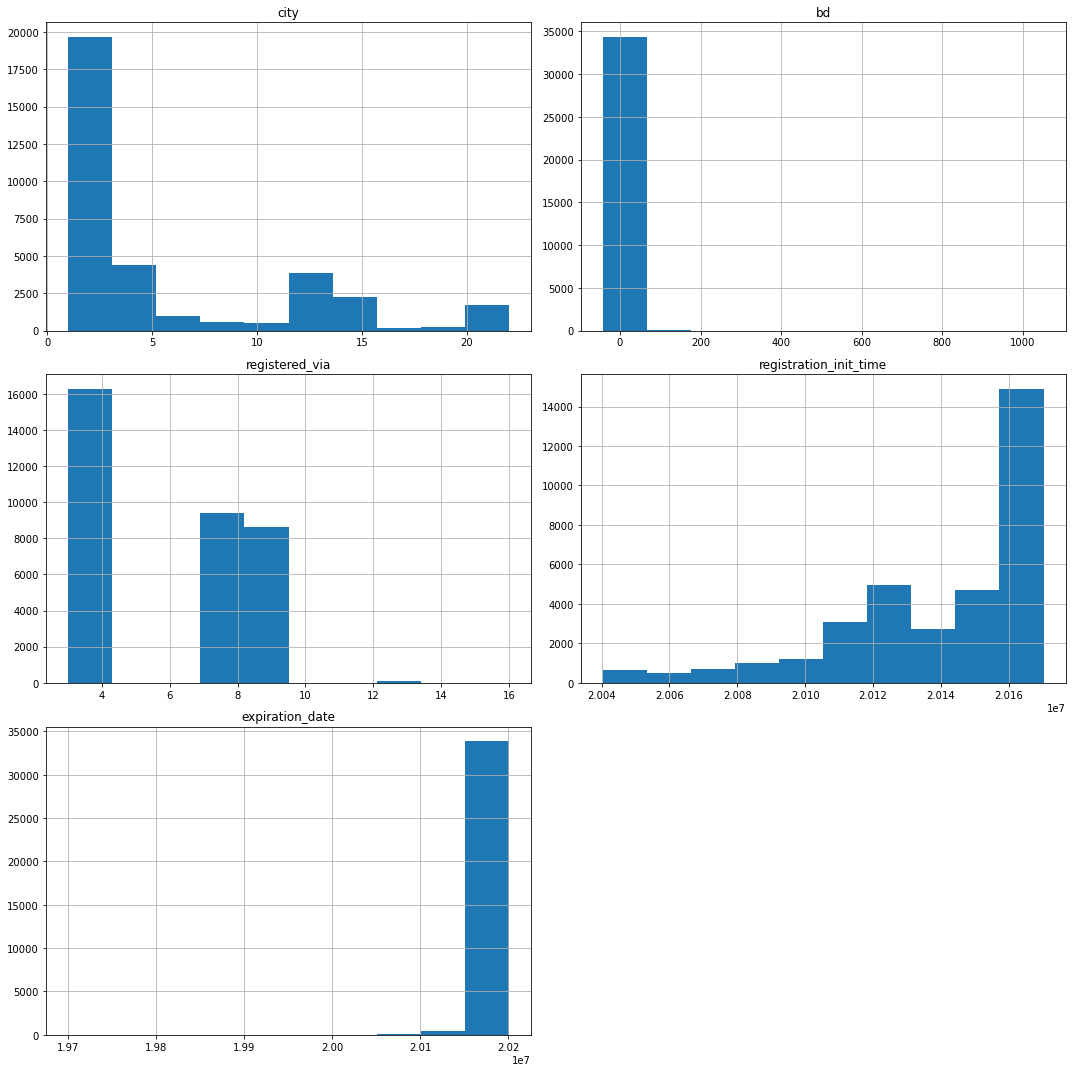

In [16]:
import matplotlib.pyplot as plt
members_data.hist(figsize=(15,15))
plt.tight_layout()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


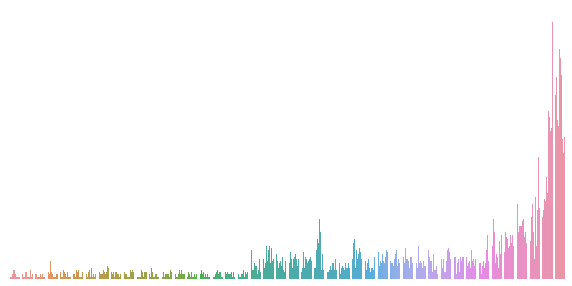

In [17]:
plt.figure(figsize = (10, 5))
sns.countplot(members_data['registration_init_time'])
plt.axis('off')
plt.show()


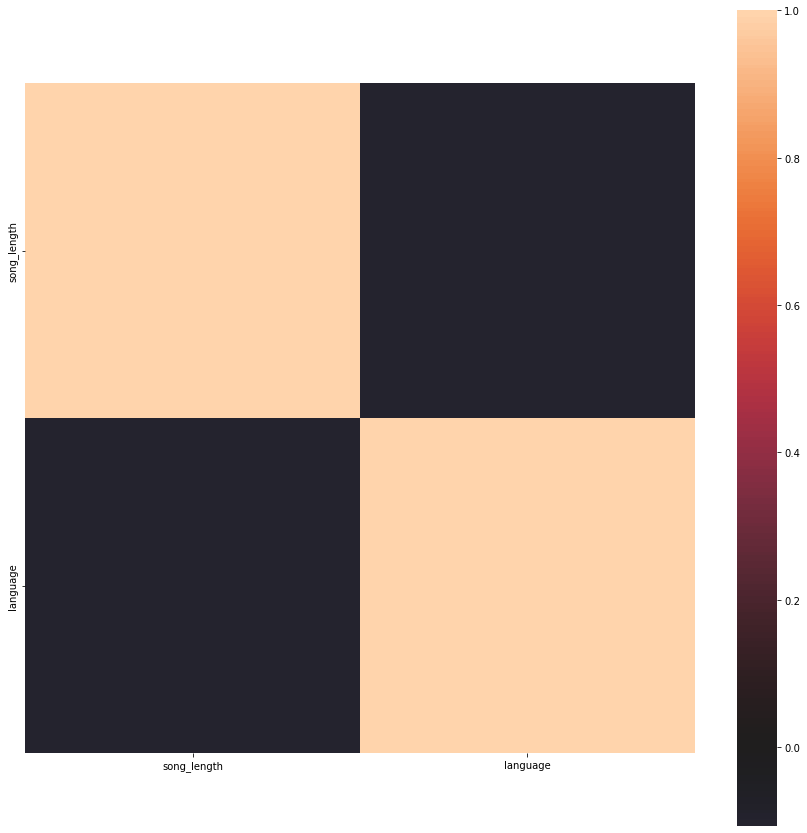

In [18]:
plt.gcf().set_size_inches(15,15)
cmap=sns.diverging_palette(500,10, as_cmap=True)
sns.heatmap(songs_data.corr(),center=0, annot=False, square=True)
plt.show()

In [19]:
songs_data.columns


Index(['song_id', 'song_length', 'genre_ids', 'artist_name', 'composer',
       'lyricist', 'language'],
      dtype='object')

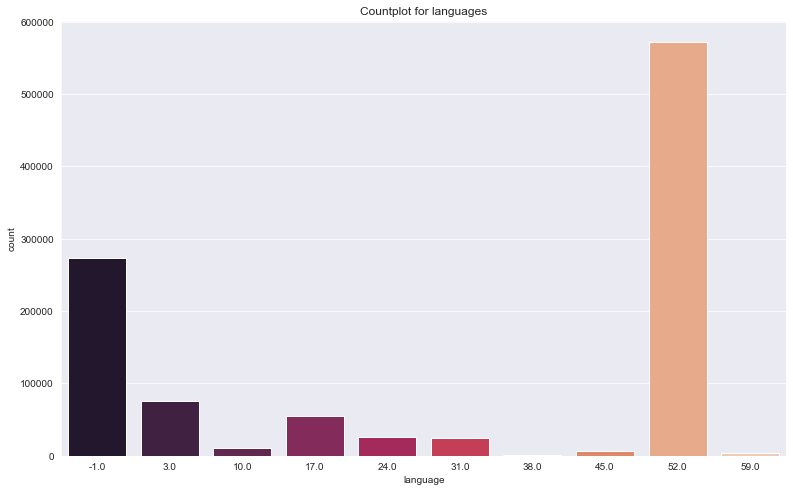

In [20]:
plt.figure(figsize = (13, 8))
sns.set_style("darkgrid")
ax = sns.countplot(x = songs_data.language, data = songs_data.language,palette="rocket",)
ax.set_title("Countplot for languages")
plt.show()

In [21]:
songs_data['genre_ids'].fillna('465',inplace=True)

In [22]:
songs_data['language'].value_counts()

 52.0    572435
-1.0     272860
 3.0      75910
 17.0     54878
 24.0     25449
 31.0     24514
 10.0     11350
 45.0      6199
 59.0      4017
 38.0       962
Name: language, dtype: int64

In [23]:
songs_data.isnull().sum()

song_id             0
song_length         0
genre_ids           0
artist_name         0
composer       478021
lyricist       860209
language            1
dtype: int64

In [24]:
songs_extra_info.isnull().sum()

song_id        0
name           2
isrc       81323
dtype: int64

In [25]:
songs_extra_info.columns

Index(['song_id', 'name', 'isrc'], dtype='object')

In [26]:
songs_extra_info.drop('isrc', axis = 1, inplace = True)

In [27]:
members_data.columns

Index(['msno', 'city', 'bd', 'gender', 'registered_via',
       'registration_init_time', 'expiration_date'],
      dtype='object')

In [28]:
members_data.describe()

,city,bd,registered_via,registration_init_time,expiration_date
count,34403.000000,34403.000000,34403.000000,3.440300e+04,3.440300e+04
mean,5.371276,12.280935,5.953376,2.013994e+07,2.016901e+07
std,6.243929,18.170251,2.287534,2.954015e+04,7.320925e+03
min,1.000000,-43.000000,3.000000,2.004033e+07,1.970010e+07
25%,1.000000,0.000000,4.000000,2.012103e+07,2.017020e+07
50%,1.000000,0.000000,7.000000,2.015090e+07,2.017091e+07
75%,10.000000,25.000000,9.000000,2.016110e+07,2.017093e+07
max,22.000000,1051.000000,16.000000,2.017023e+07,2.020102e+07


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '3'),
  Text(1, 0, '4'),
  Text(2, 0, '7'),
  Text(3, 0, '9'),
  Text(4, 0, '13'),
  Text(5, 0, '16')])

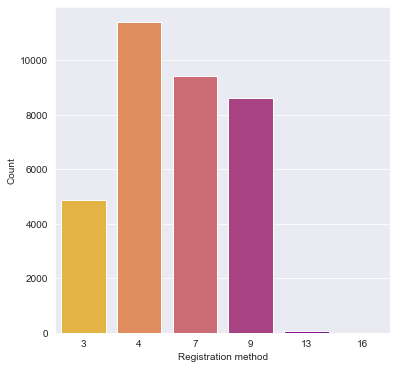

In [29]:
plt.figure(figsize=(6,6))
sns.countplot(x='registered_via', data=members_data, palette='plasma_r')
plt.xlabel('Registration method')
plt.ylabel('Count')
plt.xticks(rotation=0)


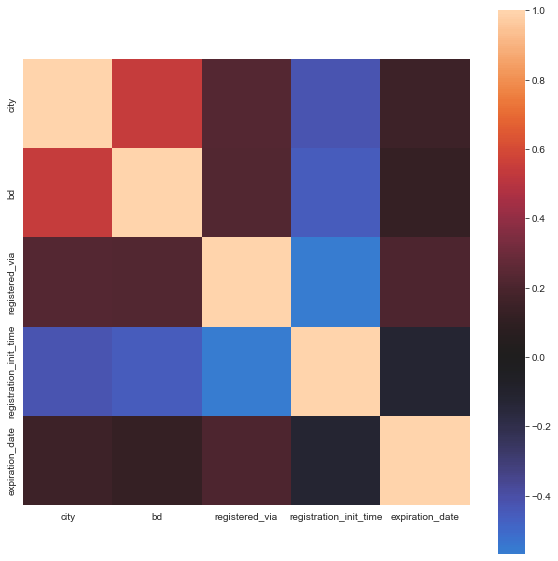

In [30]:
plt.gcf().set_size_inches(10,10)
cmap=sns.diverging_palette(500,10, as_cmap=True)
sns.heatmap(members_data.corr(),center=0, annot=False, square=True)
plt.show()

In [31]:
members_data.isnull()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,False,False,False,True,False,False,False
1,False,False,False,True,False,False,False
2,False,False,False,True,False,False,False
3,False,False,False,True,False,False,False
4,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...
34398,False,False,False,True,False,False,False
34399,False,False,False,False,False,False,False
34400,False,False,False,True,False,False,False
34401,False,False,False,True,False,False,False


In [32]:
train_data.columns

Index(['msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type', 'target'],
      dtype='object')

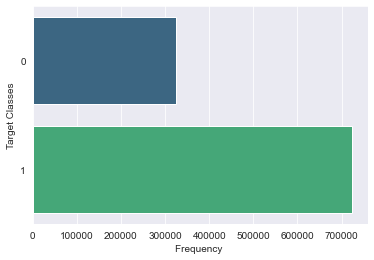

In [33]:
sns.countplot(y=train_data['target'],data=train_data, palette = 'viridis')
plt.ylabel('Target Classes')
plt.xlabel('Frequency ')
plt.show()

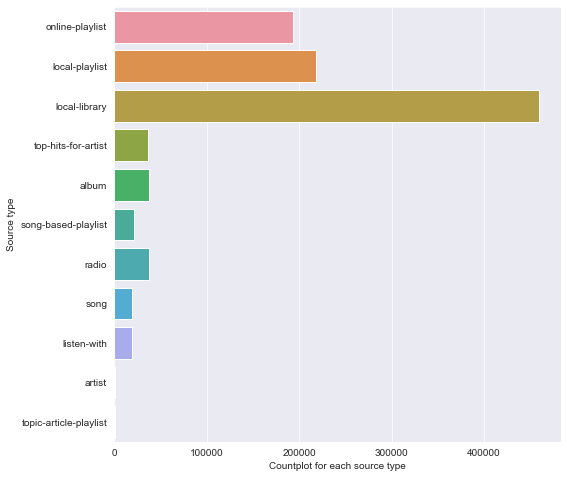

In [34]:
plt.figure(figsize = (8,8))
sns.countplot(y=train_data['source_type'],data=train_data)
plt.ylabel('Source type')
plt.xlabel('Countplot for each source type')
plt.show()

In [35]:
duplicate_values = len(train_data["msno"]) - train_data["msno"].nunique()
print("Total number of duplicate user IDs: ", duplicate_values)
print("Total percentage of duplicate user IDs: ", (duplicate_values/len(train_data["msno"]))*100, "%")

Total number of duplicate user IDs:  1031197
Total percentage of duplicate user IDs:  98.34270319242782 %


In [36]:
train_data.isnull().sum()

msno                      0
song_id                   0
source_system_tab      3106
source_screen_name    48178
source_type            2702
target                    0
dtype: int64

In [37]:
train_data

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1
...,...,...,...,...,...,...
1048570,xF+utWsPHfbvt60HOgU/ZYQ0HnboeyRf0UXo5pPyP0Q=,gLwsZgboyA4rhNmspKQpnvdsLFdv4fzQMBkcdvnCfk8=,my library,Local playlist more,local-library,0
1048571,P3obZgg2TmWGlUbGb7rz/G2CCX7cpYJ691Iyvfv2j4g=,iUYmqmX3CXBXzFIn2RiJLMLnwZ3/TSYhf9NDuZGqCBg=,discover,Discover Chart,online-playlist,1
1048572,P3obZgg2TmWGlUbGb7rz/G2CCX7cpYJ691Iyvfv2j4g=,IKoZne4v1VzCh7r0lVmOn1hOUdTMkAiniHnKELDq8es=,discover,Discover Chart,online-playlist,1
1048573,FBn5lX1m8BNAFevy7oiAe8JBxi20akyXBW7zG0MBVbQ=,T86YHdD4C9JSc274b1IlMkLuNdz4BQRB50fWWE7hx9g=,discover,Online playlist more,online-playlist,1


In [38]:
test_data.columns

Index(['id', 'msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type'],
      dtype='object')

In [39]:
sample_submission_data.columns

Index(['id', 'target'], dtype='object')

In [40]:
merged_songs = pd.merge(songs_data, songs_extra_info, on ='song_id' ,how='left')
merged_train_members = pd.merge(train_data, members_data, on ='msno' ,how='left')
train_data = pd.merge(merged_train_members, merged_songs, on ='song_id' ,how='left')

In [41]:
train_data

,msno,song_id,source_system_tab,source_screen_name,source_type,target,city,bd,gender,registered_via,registration_init_time,expiration_date,song_length,genre_ids,artist_name,composer,lyricist,language,name
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,1,0,NaN,7,20120102,20171005,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1,13,24,female,9,20110525,20170911,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1,13,24,female,9,20110525,20170911,225396.0,1259,Nas,N. Jones??W. Adams??J. Lordan??D. Ingle,NaN,52.0,Hip Hop Is Dead(Album Version (Edited))
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1,13,24,female,9,20110525,20170911,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1,1,0,NaN,7,20120102,20171005,187802.0,1011,Brett Young,Brett Young| Kelly Archer| Justin Ebach,NaN,52.0,Sleep Without You
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,xF+utWsPHfbvt60HOgU/ZYQ0HnboeyRf0UXo5pPyP0Q=,gLwsZgboyA4rhNmspKQpnvdsLFdv4fzQMBkcdvnCfk8=,my library,Local playlist more,local-library,0,1,0,NaN,7,20160212,20170213,243072.0,458,?????&SPY.C (Chen Chusheng&SPY.C),?????\???\???,??????,3.0,???? (Secret)
1048571,P3obZgg2TmWGlUbGb7rz/G2CCX7cpYJ691Iyvfv2j4g=,iUYmqmX3CXBXzFIn2RiJLMLnwZ3/TSYhf9NDuZGqCBg=,discover,Discover Chart,online-playlist,1,13,55,female,7,20110730,20170922,191930.0,1011,Old Dominion,Trevor Rosen|Matthew Ramsey|Brad Tursi|Matt Je...,Trevor Rosen|Matthew Ramsey|Brad Tursi|Matt Je...,52.0,Song for Another Time
1048572,P3obZgg2TmWGlUbGb7rz/G2CCX7cpYJ691Iyvfv2j4g=,IKoZne4v1VzCh7r0lVmOn1hOUdTMkAiniHnKELDq8es=,discover,Discover Chart,online-playlist,1,13,55,female,7,20110730,20170922,232571.0,465,Niall Horan,Niall Horan| Jamie Scott| Mike Needle| Daniel ...,NaN,52.0,This Town
1048573,FBn5lX1m8BNAFevy7oiAe8JBxi20akyXBW7zG0MBVbQ=,T86YHdD4C9JSc274b1IlMkLuNdz4BQRB50fWWE7hx9g=,discover,Online playlist more,online-playlist,1,5,29,female,9,20070607,20171221,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
train_data.isnull().sum()

msno                           0
song_id                        0
source_system_tab           3106
source_screen_name         48178
source_type                 2702
target                         0
city                           0
bd                             0
gender                    416964
registered_via                 0
registration_init_time         0
expiration_date                0
song_length               178938
genre_ids                 178938
artist_name               178938
composer                  364473
lyricist                  536846
language                  178945
name                      319276
dtype: int64

In [43]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048575 entries, 0 to 1048574
Data columns (total 19 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   msno                    1048575 non-null  object 
 1   song_id                 1048575 non-null  object 
 2   source_system_tab       1045469 non-null  object 
 3   source_screen_name      1000397 non-null  object 
 4   source_type             1045873 non-null  object 
 5   target                  1048575 non-null  int64  
 6   city                    1048575 non-null  int64  
 7   bd                      1048575 non-null  int64  
 8   gender                  631611 non-null   object 
 9   registered_via          1048575 non-null  int64  
 10  registration_init_time  1048575 non-null  int64  
 11  expiration_date         1048575 non-null  int64  
 12  song_length             869637 non-null   float64
 13  genre_ids               869637 non-null   object 
 14  ar

In [44]:
train_data.drop(['msno'], axis = 1, inplace=True)
train_data.drop(['song_id'], axis = 1, inplace=True)
train_data.drop(['composer'], axis = 1, inplace=True)
train_data.drop(['lyricist'], axis = 1, inplace=True)

In [45]:
sdf=train_data

In [46]:
from sklearn.preprocessing import LabelEncoder

In [47]:
encoder = LabelEncoder()
source_system_tab = encoder.fit_transform(sdf['source_system_tab'])
source_screen_name = encoder.fit_transform(sdf['source_screen_name'])
source_type = encoder.fit_transform(sdf['source_type'])

In [48]:
gender= encoder.fit_transform(sdf['gender'])
artist_name = encoder.fit_transform(sdf['artist_name'])
name = encoder.fit_transform(sdf['name'])
genre_ids = encoder.fit_transform(sdf['genre_ids'])

In [49]:
sdf['source_system_tab'] = source_system_tab
sdf['source_screen_name'] = source_screen_name
sdf['source_type'] = source_type
sdf['gender'] = gender
sdf['artist_name'] = artist_name
sdf['name'] = name
sdf['genre_ids'] = genre_ids

In [50]:
sdf

,source_system_tab,source_screen_name,source_type,target,city,bd,gender,registered_via,registration_init_time,expiration_date,song_length,genre_ids,artist_name,language,name
0,1,7,5,1,1,0,2,7,20120102,20171005,NaN,348,13776,NaN,56909
1,3,8,4,1,13,24,0,9,20110525,20170911,NaN,348,13776,NaN,56909
2,3,8,4,1,13,24,0,9,20110525,20170911,225396.0,53,6682,52.0,12432
3,3,8,4,1,13,24,0,9,20110525,20170911,NaN,348,13776,NaN,56909
4,1,7,5,1,1,0,2,7,20120102,20171005,187802.0,2,1488,52.0,26116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,3,8,3,0,1,0,2,7,20160212,20170213,243072.0,198,10835,3.0,45706
1048571,0,3,5,1,13,55,0,7,20110730,20170922,191930.0,2,6960,52.0,26664
1048572,0,3,5,1,13,55,0,7,20110730,20170922,232571.0,201,6775,52.0,29971
1048573,0,11,5,1,5,29,0,9,20070607,20171221,NaN,348,13776,NaN,56909


In [51]:
sdf.isnull().sum()

source_system_tab              0
source_screen_name             0
source_type                    0
target                         0
city                           0
bd                             0
gender                         0
registered_via                 0
registration_init_time         0
expiration_date                0
song_length               178938
genre_ids                      0
artist_name                    0
language                  178945
name                           0
dtype: int64

In [52]:
sdf.dropna(subset = ['genre_ids', 'song_length', 'language'], inplace = True)
sdf

,source_system_tab,source_screen_name,source_type,target,city,bd,gender,registered_via,registration_init_time,expiration_date,song_length,genre_ids,artist_name,language,name
2,3,8,4,1,13,24,0,9,20110525,20170911,225396.0,53,6682,52.0,12432
4,1,7,5,1,1,0,2,7,20120102,20171005,187802.0,2,1488,52.0,26116
5,1,7,5,1,1,0,2,7,20120102,20171005,247803.0,53,2629,52.0,56909
6,3,8,4,1,13,24,0,9,20110525,20170911,229982.0,201,994,31.0,56909
7,1,7,5,1,1,0,2,7,20120102,20171005,181115.0,2,9502,52.0,26988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048569,3,8,3,0,1,0,2,7,20160212,20170213,284839.0,53,12705,3.0,36260
1048570,3,8,3,0,1,0,2,7,20160212,20170213,243072.0,198,10835,3.0,45706
1048571,0,3,5,1,13,55,0,7,20110730,20170922,191930.0,2,6960,52.0,26664
1048572,0,3,5,1,13,55,0,7,20110730,20170922,232571.0,201,6775,52.0,29971


In [53]:
sdf.isnull().sum()

source_system_tab         0
source_screen_name        0
source_type               0
target                    0
city                      0
bd                        0
gender                    0
registered_via            0
registration_init_time    0
expiration_date           0
song_length               0
genre_ids                 0
artist_name               0
language                  0
name                      0
dtype: int64

In [54]:
sdf.to_csv('preprocessed_data2.csv')

In [55]:
sdf1=sdf[0:30000]

In [56]:
Y = sdf1.target
X = sdf1.drop('target', axis = 1)

In [57]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [58]:
X_train.shape

(22500, 14)

In [59]:
X_test.shape

(7500, 14)

In [60]:
import pandas as pd

# Load your data using pandas
data = pd.read_csv('preprocessed_data2.csv')

# Check for any non-numeric values in the data
non_numeric = data.apply(lambda s: pd.to_numeric(s, errors='coerce').isna().sum())
print(non_numeric)


Unnamed: 0                0
source_system_tab         0
source_screen_name        0
source_type               0
target                    0
city                      0
bd                        0
gender                    0
registered_via            0
registration_init_time    0
expiration_date           0
song_length               0
genre_ids                 0
artist_name               0
language                  0
name                      0
dtype: int64


In [61]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [62]:
sdf1.dtypes

source_system_tab           int32
source_screen_name          int32
source_type                 int32
target                      int64
city                        int64
bd                          int64
gender                      int32
registered_via              int64
registration_init_time      int64
expiration_date             int64
song_length               float64
genre_ids                   int32
artist_name                 int32
language                  float64
name                        int32
dtype: object

In [63]:
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)
pred = rfc.predict(X_test)

In [64]:
print ("Accuracy is :", accuracy_score(Y_test, pred)*100)
print ("\nConfusion matrix :\n",confusion_matrix(Y_test, pred))

Accuracy is : 83.91999999999999

Confusion matrix :
 [[ 938  869]
 [ 337 5356]]


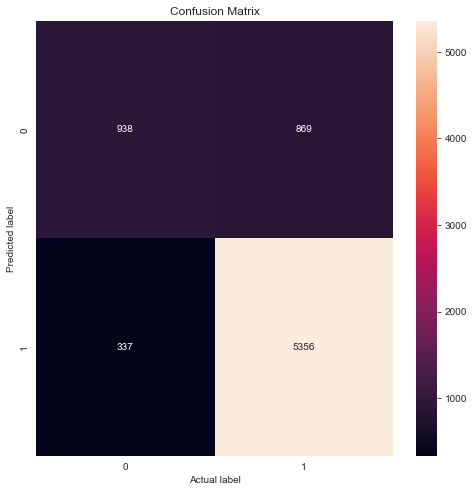

In [65]:
plt.figure(figsize = (8,8))
sns.heatmap(confusion_matrix(Y_test, pred), annot = True, fmt = 'g')
plt.xlabel('Actual label')
plt.ylabel('Predicted label')
plt.title("Confusion Matrix")
plt.show()
     

In [66]:
pred_prob = rfc.predict_proba(X_test)

In [67]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [68]:
fpr, tpr, thresh = roc_curve(Y_test, pred_prob[:,1], pos_label=1)
auc_score = roc_auc_score(Y_test, pred_prob[:,1])

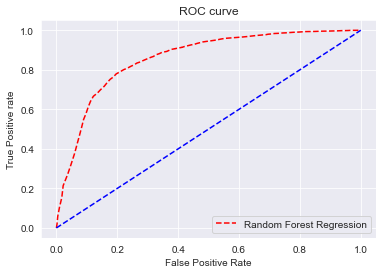

In [69]:
sns.set_style('darkgrid')
# plot roc curves
plt.plot(fpr, tpr, linestyle='--',color='red', label='Random Forest Regression')
#plt.plot(thresh, linestyle='--', color='blue')
plt.plot([0, 1], ls="--", color='blue')
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend()
plt.savefig('ROC',dpi=300)
plt.show();